# Statistical Analysis and Hypothesis Testing for Health Insurance Company

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


## Overview of the data
This data helps to understand the relationships between people characterics and how much it costs to insure them.
How much premium would be better for specific person.
here the target variable will be charges.


#### Discription of the data
The data is having columns
1. age : age of the customer.
2. Sex: Gender of the cutomer
3. BMI: Body mass index of the customer shows the healtheness of the individual
4. childern: how many childeren the individual has.
5. smoker: Is the person is smoker or not.
6. region: which region the person belong
7. chargers: the premium the person is paying.

*** Basic understanding of the data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.duplicated().sum()

1

In [6]:
## there is one duplicte so removing the duplicate


In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

#### Univariate Analysis


<Axes: xlabel='age', ylabel='Density'>

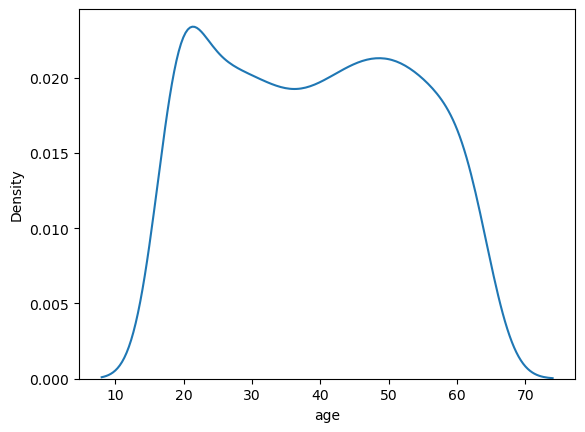

In [9]:
sns.kdeplot(data=df,x="age")
## not following the normal distribution

Text(0.5, 1.0, 'Countplot of Top 5 ages')

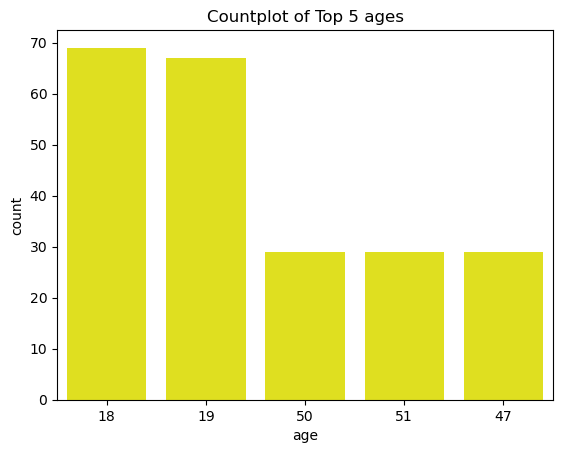

In [10]:
top_5_categories = df['age'].value_counts().index[:5]
sns.countplot(data=df, x='age', order=top_5_categories, color="yellow")
plt.title('Countplot of Top 5 ages')

<Axes: xlabel='bmi', ylabel='Density'>

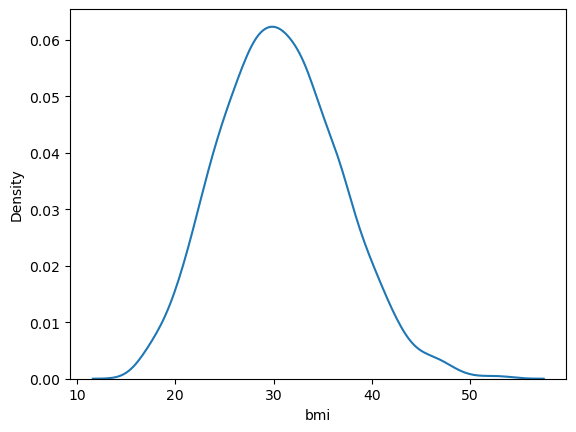

In [11]:
sns.kdeplot(data=df,x="bmi")
## following normal distribution

In [12]:
df["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1337, dtype: float64

In [13]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Example usage

bmi_categories = [categorize_bmi(bmi) for bmi in df["bmi"]]

df["bmi_categories"]=bmi_categories


<Axes: xlabel='children', ylabel='count'>

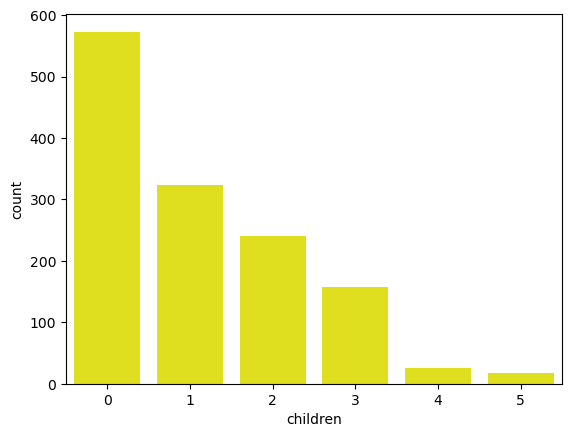

In [14]:
sns.countplot(data=df,x="children", color="yellow")
## the persons with no childeren are more

<Axes: xlabel='sex', ylabel='count'>

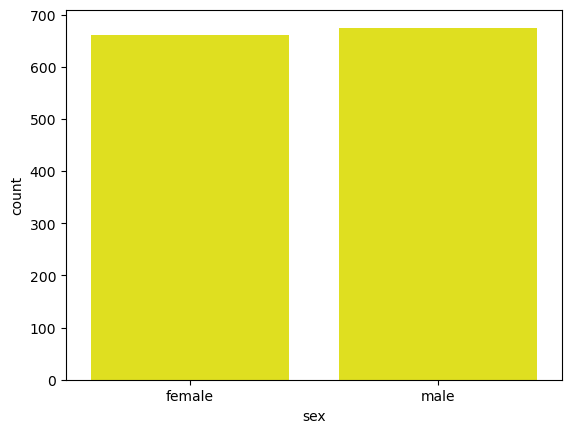

In [15]:
sns.countplot(data=df, x="sex", color="yellow")

<Axes: xlabel='region', ylabel='count'>

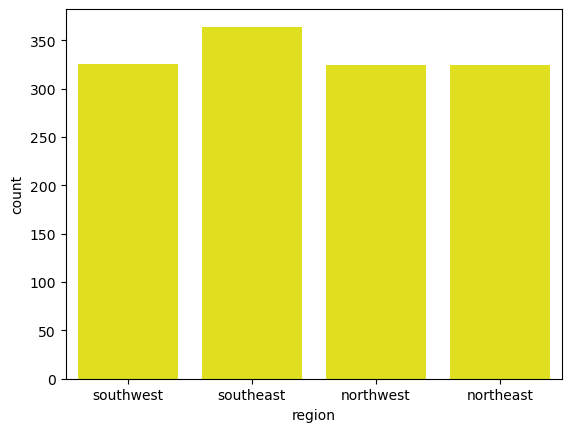

In [16]:
sns.countplot(data=df, x="region", color="yellow")

*** By doing univariate analysis it is concluded that
1. Number of members in 18 or 19 age are higest to purchase the health insurence
2. the persons with no childeren are more
3. male are sightly higher
4. southeast members are highest amoung all

###  As charges column is our main column so doing bivariate analysis with help of that column.

### Age and Charges

<Axes: xlabel='age', ylabel='charges'>

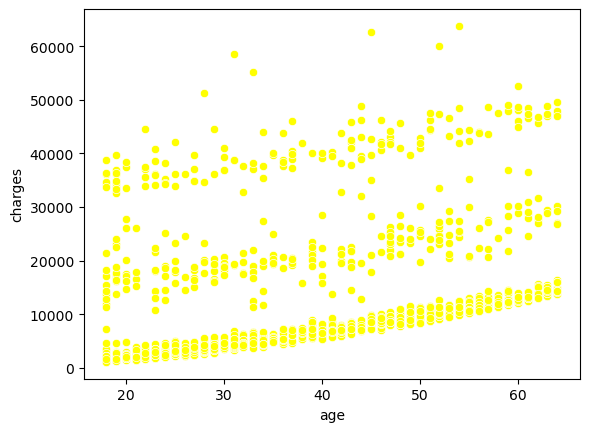

In [17]:
sns.scatterplot(data=df, x="age", y="charges", color="yellow")
## showing linearly upward pattern

### Sex and Charges

<Axes: xlabel='sex', ylabel='charges'>

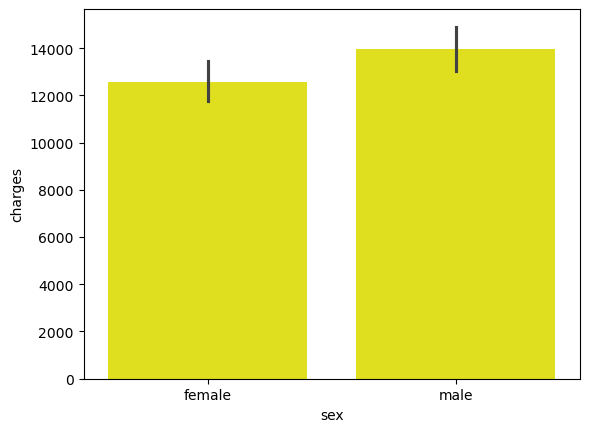

In [18]:
sns.barplot(data=df, x="sex", y="charges", color="yellow")
## male are more to give premium

<Axes: xlabel='bmi_categories', ylabel='charges'>

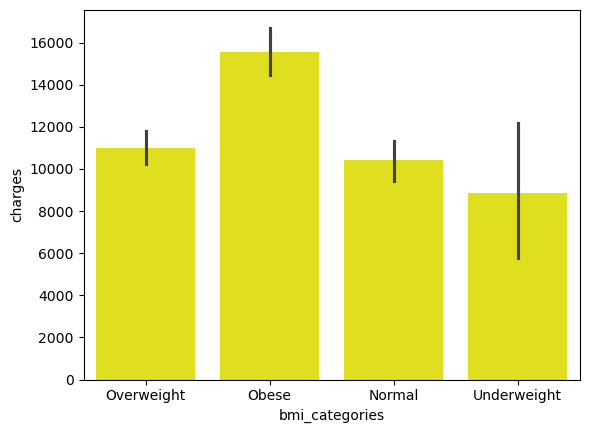

In [19]:
sns.barplot(data=df, x="bmi_categories", y="charges", color="yellow")
## obese people are paying higher money

In [20]:
df.sample(4)

,age,sex,bmi,children,smoker,region,charges,bmi_categories
841,59,male,24.700,0,no,northeast,12323.93600,Normal
571,18,female,37.290,1,no,southeast,2219.44510,Obese
632,29,female,35.530,0,no,southeast,3366.66970,Obese
1220,30,female,21.945,1,no,northeast,4718.20355,Normal


<Axes: xlabel='children', ylabel='charges'>

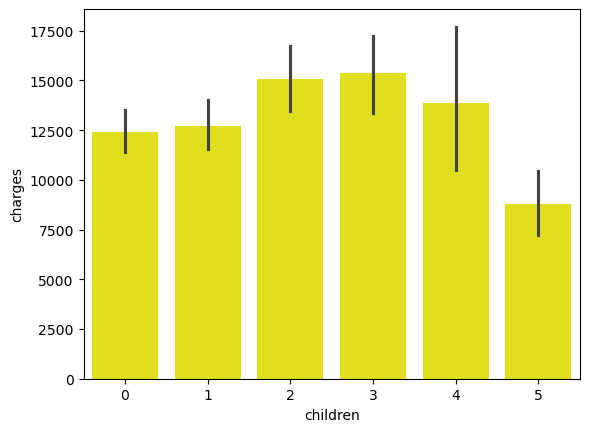

In [21]:
sns.barplot(data=df, x="children", y="charges", color="yellow")

<Axes: xlabel='smoker', ylabel='charges'>

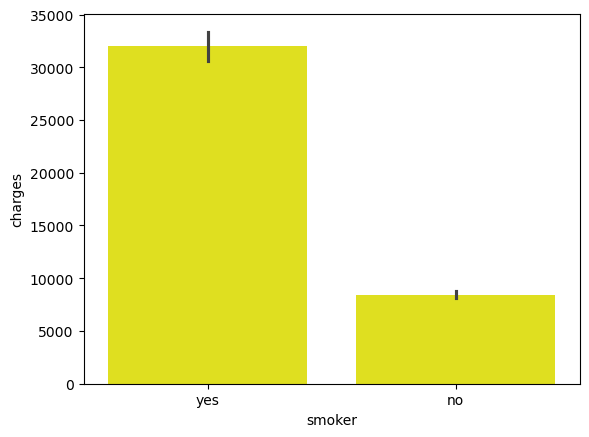

In [22]:
sns.barplot(data=df, x="smoker", y="charges", color="yellow")

<Axes: xlabel='region', ylabel='charges'>

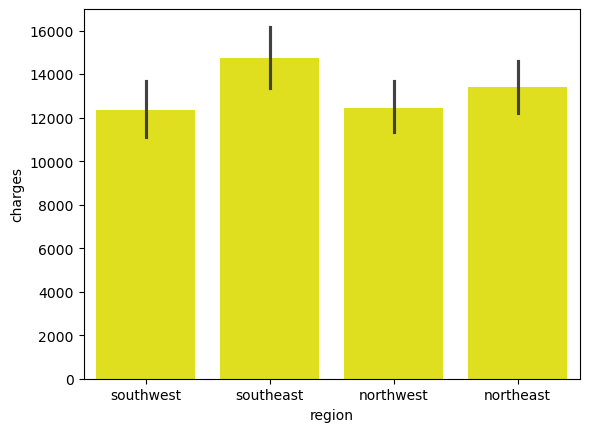

In [23]:
sns.barplot(data=df, x="region", y="charges", color="yellow")

##### conclusion of bivariate data analysis
1. age and charges there is a positive correlation.
2. male members are paying more premium then the female members.
3. obese people are paying more then other categaries people.
4. smokers are paying more then non-smokers.
5. southest people are paying more premiums then other people.

##### Both univariate and bivariate are indicating that the number of male members 
##### are more and there are paying more premiums then females
##### lets validate this by hypothesis testing


In [25]:
df.shape

(1337, 8)

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_categories'],
      dtype='object')

### Null hypothesis: there is no difference between the male charges and female charges
### Alternative hypothesis: there is a difference between charges of two groups

In [27]:
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']

<Axes: xlabel='charges', ylabel='Density'>

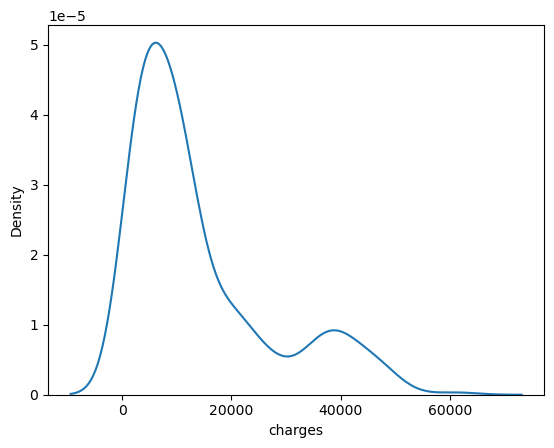

In [28]:
## to see the assumption of the independent t test
## normality test
sns.kdeplot(data=male_charges)

<Axes: xlabel='charges', ylabel='Density'>

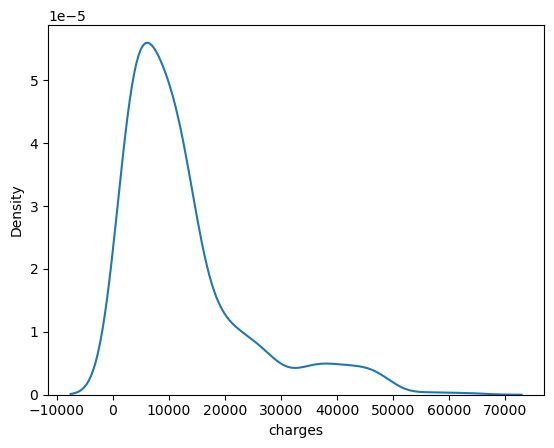

In [29]:
sns.kdeplot(data=female_charges)

In [30]:
## as the data s not normally distributed then 
## using the Mann-Whitney U Test (Non-Parametric Test)
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(male_charges, female_charges, alternative='two-sided')

print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")


U-Statistic: 226198.0
P-Value: 0.6944793894954917


###### A p-value of 0.6944 from the Mann-Whitney U Test indicates that there is no statistically significant difference between the charges of males and females in your data.
** It suggests that the observed difference in charges between males and females is likely due to random chance rather than a true underlying difference.

** we fail to reject the null hypothesis

based on the data you have, gender may not be a factor affecting the charges.

##### hypothesis testing
##### assumption: there is significant difference between average of BMI categories
#### solving by Anova analysis


In [31]:
##spliting the groups by BMI Category
underweight_charges = df[df['bmi_categories'] == 'Underweight']['charges']
normal_charges = df[df['bmi_categories'] == 'Normal']['charges']
overweight_charges = df[df['bmi_categories'] == 'Overweight']['charges']
obese_charges = df[df['bmi_categories'] == 'Obese']['charges']

In [32]:
## checking the assumption
import pandas as pd
import scipy.stats as stats

# Performing the Shapiro-Wilk test for each BMI category
bmi_categories = df['bmi_categories'].unique()

for category in bmi_categories:
    category_data = df[df['bmi_categories'] == category]['charges']
    stat, p_value = stats.shapiro(category_data)
    print(f"BMI Category: {category}")
    print(f"Shapiro-Wilk Test Statistic: {stat}")
    print(f"P-Value: {p_value}")
    print("-" * 40)


BMI Category: Overweight
Shapiro-Wilk Test Statistic: 0.8976722955703735
P-Value: 2.0082126269533283e-15
----------------------------------------
BMI Category: Obese
Shapiro-Wilk Test Statistic: 0.8049670457839966
P-Value: 2.6028952828043214e-28
----------------------------------------
BMI Category: Normal
Shapiro-Wilk Test Statistic: 0.9173892736434937
P-Value: 7.195017359684641e-10
----------------------------------------
BMI Category: Underweight
Shapiro-Wilk Test Statistic: 0.8333337306976318
P-Value: 0.0028377315029501915
----------------------------------------


** as my data is not normally distributed so applying anather test called Kruskal-Wallis Test

## Null hypothesis : there is no difference in the median(charges) of these bmi categories 
## Alternative hypothesis : there is difference in the median(charges) of these bmi categories

In [33]:
import pandas as pd
import scipy.stats as stats
stat, p_value = stats.kruskal(underweight_charges, normal_charges, overweight_charges, obese_charges)

print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-Value: {p_value}")

Kruskal-Wallis Statistic: 17.047863697498542
P-Value: 0.0006909023796032061


--> here P value that is 0.00069 smaller then 0.05 so
--> we have to reject the null hypothesis 
and accept the fact that amoung bmi categories median are different
bmi categories is affecting the charges

In [34]:
## hypothesis testing
## is there average difference between the smoker and nonsmoker in charges
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

<Axes: xlabel='charges', ylabel='Density'>

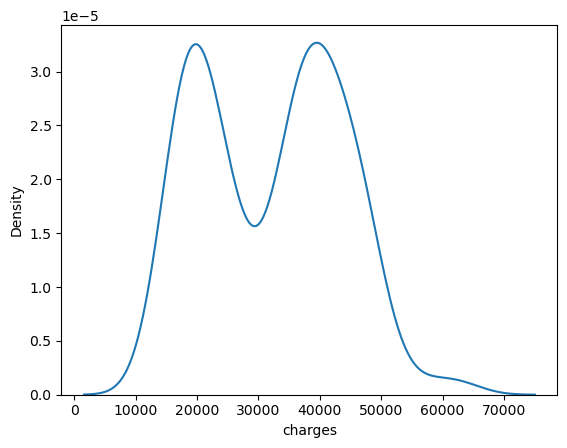

In [35]:
sns.kdeplot(data=smoker_charges) 
## not following normal distribution

<Axes: xlabel='charges', ylabel='Density'>

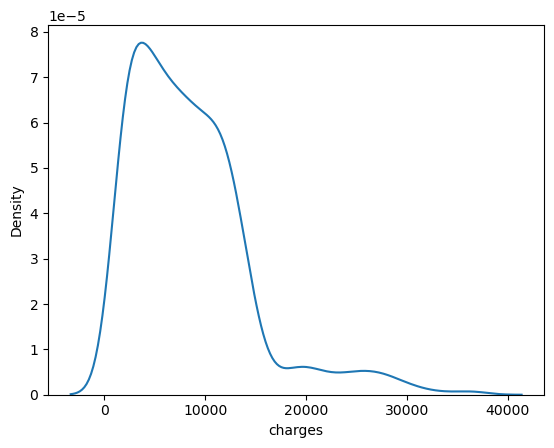

In [36]:
sns.kdeplot(data=non_smoker_charges)
#no normal distribution

## hypothsis testing
** null hypothesis: there is significant difference between the rank sum of the two categories
alternative hypothesis: there is significant difference between the rank sum of the groups

In [37]:
## as the data s not normally distributed then 
## using the Mann-Whitney U Test (Non-Parametric Test)
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(smoker_charges, non_smoker_charges)

print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")

U-Statistic: 283859.0
P-Value: 5.74701188239214e-130


## p value is very small indicating highly difference in average in smoker and non smoker group

Null_hypothesis: there is no significant difference between the no of chilfren and there charges.


Alternative_hypothesis: there is significant difference between the number of children and there charges.    

In [49]:
## Number of childern will influence the charges
noChildern_charges = df[df['children'] == 0]['charges']
oneChild_charges = df[df['children'] == 1]['charges']
twoChildren_charges = df[df['children'] == 2]['charges']
threeChildren_charges = df[df['children'] == 3]['charges']
fourChildren_charges = df[df['children'] == 4]['charges']
fiveChilderen_charges = df[df['children'] == 5]['charges']


In [50]:
## checking the assumption
import pandas as pd
import scipy.stats as stats

# Performing the Shapiro-Wilk test for each BMI category
children_ = df['children'].unique()

for category in children_:
    category_data = df[df['children'] == category]['charges']
    stat, p_value = stats.shapiro(category_data)
    print(f"children: {category}")
    print(f"Shapiro-Wilk Test Statistic: {stat}")
    print(f"P-Value: {p_value}")
    print("-" * 40)


children: 0
Shapiro-Wilk Test Statistic: 0.8172773122787476
P-Value: 5.448950206591934e-25
----------------------------------------
children: 1
Shapiro-Wilk Test Statistic: 0.7752900123596191
P-Value: 8.85195296399475e-21
----------------------------------------
children: 3
Shapiro-Wilk Test Statistic: 0.8057762980461121
P-Value: 3.6353431658205093e-13
----------------------------------------
children: 2
Shapiro-Wilk Test Statistic: 0.7951911687850952
P-Value: 4.783241044387092e-17
----------------------------------------
children: 5
Shapiro-Wilk Test Statistic: 0.890959620475769
P-Value: 0.040083467960357666
----------------------------------------
children: 4
Shapiro-Wilk Test Statistic: 0.8294429183006287
P-Value: 0.0007348770159296691
----------------------------------------


** in all the cases p value < 0.05 so the data is normaly distributed

In [51]:
import pandas as pd
import scipy.stats as stats
# Performing the ANOVA test
f_statistic, p_value = stats.f_oneway(noChildern_charges, oneChild_charges, twoChildren_charges,threeChildren_charges, fourChildren_charges,fiveChilderen_charges)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 3.2687344101195737
P-Value: 0.006133448188169501


#### we reject the null hypothesis and conclude that there is a statistically significant difference between the means of the groups (i.e., charges differ based on the number of children).